<a href="https://colab.research.google.com/github/3R3NY34G3R/CPE313---Advanced-Machine-Learning-and-Deep-Learning/blob/main/Hands_on_Activity_2_1_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 2.1 : Convolutional Neural Network

#### Objective(s):

This activity aims to introduce how to build a convolutional neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network
* Evaluate the accuracy and loss of the model using convolutional neural network

#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [2]:
!pip install -q tensorflow

In [3]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

* Shuffle the data
* Split the data into train and test sets

In [4]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [5]:

x_train[444].shape

(32, 32, 3)

Visualize one of the images

[9]


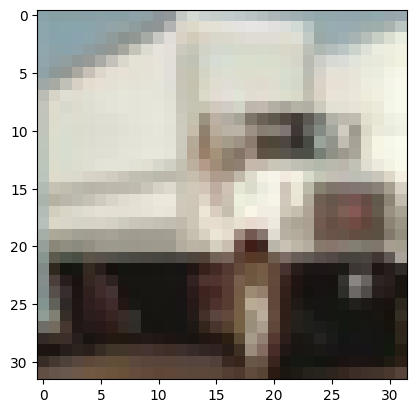

In [6]:
print(y_train[444])
plt.imshow(x_train[444]);

In [7]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [8]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

Convert to float and scale the datasets

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential

In [10]:

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 16, 16, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 6, 6, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       147,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181,162 (707.66 KB)

 Trainable params: 181,162 (707.66 KB)

 Non-trainable params: 0 (0.00 B)

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [11]:
batch_size = 32

opt = keras.optimizers.RMSprop(learning_rate=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.2928 - loss: 1.9164 - val_accuracy: 0.4567 - val_loss: 1.4994
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 20ms/step - accuracy: 0.4498 - loss: 1.5109 - val_accuracy: 0.4953 - val_loss: 1.4292
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.5034 - loss: 1.3817 - val_accuracy: 0.5481 - val_loss: 1.2662
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.5360 - loss: 1.2990 - val_accuracy: 0.5568 - val_loss: 1.2432
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.5575 - loss: 1.2356 - val_accuracy: 0.5763 - val_loss: 1.1974
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5832 - loss: 1.1894 - val_accuracy: 0.5827 - val_loss: 1.1724
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5908 - loss: 1.1631 - val_accuracy: 0.6033 - val_loss: 1.1108
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6031 -

#### Supplementary Activity

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

* Use different structures and run times, and see how accurate your model can be.


### Build a more complicated model with the following pattern: Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification


### Use strides of 1 for all convolutional layers.


In [12]:
model_2 = Sequential()

# 3x3 convolution with 1x1 stride and 32 filters
model_2.add(Conv2D(32, (3, 3), strides=(1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))

# 3x3 convolution with 1x1 stride and 32 filters
model_2.add(Conv2D(32, (3, 3), strides=(1,1), padding='same'))
model_2.add(Activation('relu'))

# 2x2 max pooling reduces to 3 x 3 x 32
model_2.add(MaxPooling2D(pool_size=(2, 2)))
#drop
model_2.add(Dropout(0.25))

# 3x3 convolution with 1x1 stride and 64 filters
model_2.add(Conv2D(64, (3, 3), strides=(1,1), padding='same'))
model_2.add(Activation('relu'))

# 3x3 convolution with 1x1 stride and 64 filters
model_2.add(Conv2D(64, (3, 3), strides=(1,1), padding='same'))
model_2.add(Activation('relu'))

# 2x2 max pooling reduces to 3 x 3 x 32
model_2.add(MaxPooling2D(pool_size=(2, 2)))
# Drop 25 %
model_2.add(Dropout(0.25))

# flaten
model_2.add(Flatten())
# dense
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
# classification
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

print("Model 'model_2' created successfully.")

Model 'model_2' created successfully.


### Write the number of parameters of your model and compare it to the previous model


In [13]:
model_2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

### Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?


In [14]:
opt_2 = keras.optimizers.RMSprop(learning_rate=0.0005)

model_2.compile(
    loss='categorical_crossentropy',
    optimizer=opt_2,
    metrics=['accuracy']
)

print("Model 'model_2' compiled successfully.")

Model 'model_2' compiled successfully.


In [15]:
import time

start_time_2 = time.time()
history_2 = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=5,
    validation_data=(x_test, y_test)
)
end_time_2 = time.time()
training_time_2 = end_time_2 - start_time_2

print(f"\nModel 'model_2' trained successfully in {training_time_2:.2f} seconds.")


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 271s 172ms/step - accuracy: 0.3397 - loss: 1.8034 - val_accuracy: 0.5762 - val_loss: 1.1630
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 318s 169ms/step - accuracy: 0.5848 - loss: 1.1684 - val_accuracy: 0.6523 - val_loss: 0.9835
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 321s 169ms/step - accuracy: 0.6630 - loss: 0.9603 - val_accuracy: 0.6982 - val_loss: 0.8751
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 272s 174ms/step - accuracy: 0.6953 - loss: 0.8739 - val_accuracy: 0.6947 - val_loss: 0.8957
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 315s 169ms/step - accuracy: 0.7280 - loss: 0.7920 - val_accuracy: 0.7325 - val_loss: 0.7703

Model 'model_2' trained successfully in 1497.35 seconds.


### Use different structures and run times, and see how accurate your model can be.

In [22]:
model_3 = Sequential()

model_3.add(Conv2D(32, (7,7), strides=(2,2), padding='same', input_shape=x_train.shape[1:])) # filtering 32, convol 7,7 stride 2,2
model_3.add(Activation('relu')) # activation relu

model_3.add(Conv2D(64, (5,5), strides=(1,1), padding='same'))
model_3.add(Activation('relu'))

model_3.add(MaxPooling2D(pool_size=(4,4)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
model_3.add(Activation('relu'))

model_3.add(Conv2D(256, (3,3), strides=(1,1), padding='same'))
model_3.add(Activation('relu'))

model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(128))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))

model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

print("Custom CNN model created successfully.")
model_3.summary()

Custom CNN model created successfully.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 32)     │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 459,210 (1.75 MB)

 Trainable params: 459,210 (1.75 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
opt_3 = keras.optimizers.RMSprop(learning_rate=0.0001)

model_3.compile(
    loss='categorical_crossentropy',
    optimizer=opt_3,
    metrics=['accuracy']
)

print("Model 'model_3' compiled successfully.")

Model 'model_3' compiled successfully.


In [26]:
import time

start_time_3 = time.time()
history_3 = model_3.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=7,
    validation_data=(x_test, y_test)
)
end_time_3 = time.time()
training_time_3 = end_time_3 - start_time_3

print(f"\nModel 'model_3' trained successfully in {training_time_2:.2f} seconds.")


Epoch 1/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 159s 100ms/step - accuracy: 0.6342 - loss: 1.0956 - val_accuracy: 0.6654 - val_loss: 0.9883
Epoch 2/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 157s 101ms/step - accuracy: 0.6564 - loss: 1.0201 - val_accuracy: 0.6693 - val_loss: 0.9812
Epoch 3/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 160s 102ms/step - accuracy: 0.6693 - loss: 0.9945 - val_accuracy: 0.6670 - val_loss: 0.9798
Epoch 4/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 157s 100ms/step - accuracy: 0.6671 - loss: 1.0010 - val_accuracy: 0.6747 - val_loss: 0.9761
Epoch 5/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 159s 102ms/step - accuracy: 0.6678 - loss: 1.0041 - val_accuracy: 0.6720 - val_loss: 0.9740
Epoch 6/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 200s 101ms/step - accuracy: 0.6741 - loss: 0.9825 - val_accuracy: 0.6760 - val_loss: 0.9670
Epoch 7/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 205s 103ms/step - accuracy: 0.6692 - loss: 0.9902 - val_accuracy: 0.6840 - val_loss: 0.9531

Model 'model_3' trained successfully in 1497.35 seconds.


In [28]:
from tensorflow.keras.layers import BatchNormalization

model_4 = Sequential()

# filtering 32
model_4.add(Conv2D(32, (3,3), padding='same', input_shape=x_train.shape[1:]))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))

model_4.add(Conv2D(32, (3,3), padding='same'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))

model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.2))

# filtering 64
model_4.add(Conv2D(64, (3,3), padding='same'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))

model_4.add(Conv2D(64, (3,3), padding='same'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))

model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.25))

#filtering 128
model_4.add(Conv2D(128, (3,3), padding='same'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))

model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.3))

model_4.add(Flatten())
model_4.add(Dense(256))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))

model_4.add(Dense(num_classes, activation='softmax'))

model_4.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_31 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_32 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 668,842 (2.55 MB)

 Trainable params: 667,690 (2.55 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [29]:
opt_4 = keras.optimizers.Adam(learning_rate=0.0005)

model_4.compile(
    loss='categorical_crossentropy',
    optimizer=opt_4,
    metrics=['accuracy']
)


In [31]:
import time

start_time_4 = time.time()
history_4 = model_4.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=5,
    validation_data=(x_test, y_test)
)
end_time_4 = time.time()
training_time_4 = end_time_4 - start_time_4

print(f"\nModel 'model_4' trained successfully in {training_time_2:.2f} seconds.")


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 350s 224ms/step - accuracy: 0.3876 - loss: 1.7437 - val_accuracy: 0.5673 - val_loss: 1.2174
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 349s 223ms/step - accuracy: 0.5878 - loss: 1.1519 - val_accuracy: 0.6710 - val_loss: 0.9436
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 373s 217ms/step - accuracy: 0.6629 - loss: 0.9510 - val_accuracy: 0.7113 - val_loss: 0.8219
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 382s 217ms/step - accuracy: 0.6997 - loss: 0.8491 - val_accuracy: 0.7208 - val_loss: 0.7989
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 385s 219ms/step - accuracy: 0.7245 - loss: 0.7892 - val_accuracy: 0.5910 - val_loss: 1.2957

Model 'model_4' trained successfully in 1497.35 seconds.


#### Conclusion

Doing this activity i learn how to create Convolutional neural network (CNN), also i learn how to calibrate the CNN model, but my model 3 was not that great in the layers i tried to use incremental method for the filter starts with 32 to 256 because i research that the 32-64 filtering captures basic details like the edges, corners while 128 higher captures more detailed. then i used stride 2 and 1, 1 pixel at a time (use to preseve the details in the image) or 2 pixel at a time, then i tried to used max pooling 4,4 and 2,2 and i drop 25% in the max pooling, then 50% in last layer. but i only reach 66% accuracy in training and 68% accuracy in validation, and in model 4 i tried to used 2 of each filtering from 32 to 128 then also i tried to run the model in 7 epochs beyond 5 epoch it shows overfitting, the loss start rise again in validation and then the accurary drops while in the training the accuracy still rising and the loss still droping.